<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

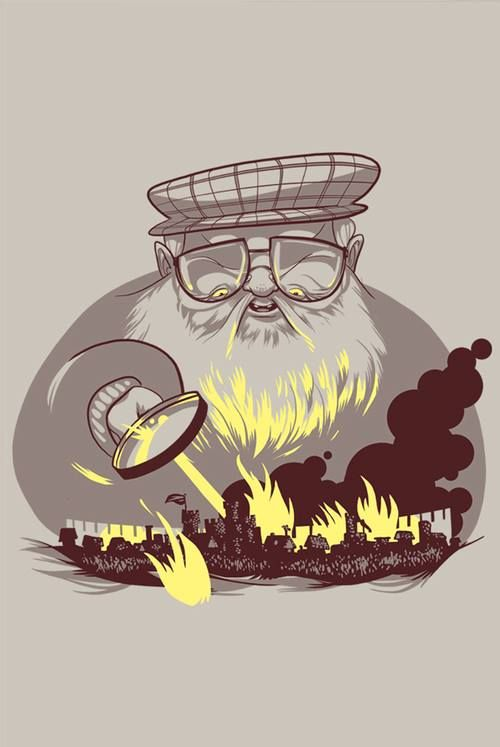

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 74.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 3.66MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [3]:
data = pd.read_csv('/content/game_of_thrones_train.csv', index_col='S.No')

# Просмотр датафрейма
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [4]:
# Проверка наличия NaN значений в каждой колонке
nan_summary = data.isnull().sum()
print("Количество NaN значений в каждой колонке:")
print(nan_summary)

Количество NaN значений в каждой колонке:
name                   0
title                840
male                   0
culture             1069
dateOfBirth         1278
mother              1539
father              1535
heir                1536
house                381
spouse              1357
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isAliveMother       1539
isAliveFather       1535
isAliveHeir         1536
isAliveSpouse       1357
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64


In [5]:
# Обработка NaN значений
if nan_summary.sum() > 0:
    # Заполняем NaN значениями медианы или моды
    for column in data.columns:
        if data[column].dtype == 'float64' or data[column].dtype == 'int64':
            # Заполнение медианой для числовых данных
            median_value = data[column].median()
            data[column].fillna(median_value, inplace=True)
        else:
            # Заполнение модой для категориальных данных
            mode_value = data[column].mode()[0]
            data[column].fillna(mode_value, inplace=True)

    print("\nПосле заполнения NaN значений:")
    print(data.isnull().sum())
else:
    print("\nВ датасете нет NaN значений.")


После заполнения NaN значений:
name                0
title               0
male                0
culture             0
dateOfBirth         0
mother              0
father              0
heir                0
house               0
spouse              0
book1               0
book2               0
book3               0
book4               0
book5               0
isAliveMother       0
isAliveFather       0
isAliveHeir         0
isAliveSpouse       0
isMarried           0
isNoble             0
age                 0
numDeadRelations    0
popularity          0
isAlive             0
dtype: int64


<ipython-input-5-434c7190fcf5>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(mode_value, inplace=True)
<ipython-input-5-434c7190fcf5>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [6]:
# Создание признака isPopular на основе порога popularity score (название атрибута в задании некорректное!)
data['isPopular'] = data['popularity'].apply(lambda x: 1 if x > 0.5 else 0)
print(data.head())

                      name                 title  male   culture  dateOfBirth  \
S.No                                                                            
1     Viserys II Targaryen                   Ser     1  Northmen        272.0   
2              Walder Frey  Lord of the Crossing     1  Rivermen        208.0   
3             Addison Hill                   Ser     1  Northmen        272.0   
4              Aemma Arryn                 Queen     0  Northmen         82.0   
5           Sylva Santagar            Greenstone     0   Dornish        276.0   

                  mother             father                 heir  \
S.No                                                               
1     Rhaenyra Targaryen   Daemon Targaryen   Aegon IV Targaryen   
2       Cersei Lannister  Aegon I Targaryen  Jaehaerys Targaryen   
3       Cersei Lannister  Aegon I Targaryen  Jaehaerys Targaryen   
4       Cersei Lannister  Aegon I Targaryen  Jaehaerys Targaryen   
5       Cersei Lannister

In [7]:
# Создание признака boolDeadRelations на основе признака numDeadRelations
data['boolDeadRelations'] = data['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)
print(data.head())

                      name                 title  male   culture  dateOfBirth  \
S.No                                                                            
1     Viserys II Targaryen                   Ser     1  Northmen        272.0   
2              Walder Frey  Lord of the Crossing     1  Rivermen        208.0   
3             Addison Hill                   Ser     1  Northmen        272.0   
4              Aemma Arryn                 Queen     0  Northmen         82.0   
5           Sylva Santagar            Greenstone     0   Dornish        276.0   

                  mother             father                 heir  \
S.No                                                               
1     Rhaenyra Targaryen   Daemon Targaryen   Aegon IV Targaryen   
2       Cersei Lannister  Aegon I Targaryen  Jaehaerys Targaryen   
3       Cersei Lannister  Aegon I Targaryen  Jaehaerys Targaryen   
4       Cersei Lannister  Aegon I Targaryen  Jaehaerys Targaryen   
5       Cersei Lannister

In [8]:
# Словарь
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

# Функция для упрощения признака culture
def simplify_culture(culture):
    for key, values in cult.items():
        if culture.lower() in values:
            return key
    return culture

# Применение функции к колонке culture
data['simplified_culture'] = data['culture'].apply(simplify_culture)

# Просмотр первых строк для проверки
print(data[['culture', 'simplified_culture']].head())

       culture simplified_culture
S.No                             
1     Northmen           Northmen
2     Rivermen           Rivermen
3     Northmen           Northmen
4     Northmen           Northmen
5      Dornish            Dornish


In [9]:
# Вывод уникальных значений колонки culture
unique_cultures = data['culture'].unique()
print("Уникальные значения колонки culture:")
print(unique_cultures)

Уникальные значения колонки culture:
['Northmen' 'Rivermen' 'Dornish' 'Valyrian' 'Ironborn' 'Free Folk'
 'Summer Isles' 'Braavosi' 'Dothraki' 'Ghiscari' 'Vale mountain clans'
 'Reach' 'Tyroshi' 'Lhazarene' 'Free folk' 'Ironmen' 'Qartheen' 'Lysene'
 'westermen' 'Westerman' 'Qarth' 'Lyseni' 'northmen' 'Qohor' 'Westeros'
 'Norvoshi' 'First Men' 'Meereenese' 'Andal' 'Astapori' 'Westermen'
 'ironborn' 'Ghiscaricari' 'Braavos' 'Stormlands' 'Valemen' 'Myrish'
 'Lhazareen' 'Dornishmen' 'Sistermen' 'Northern mountain clans' 'Andals'
 'Vale' 'Crannogmen' 'Wildling' 'Dorne' 'Pentoshi' 'free folk'
 'Summer Islander' 'Westerlands' 'Summer Islands']


In [10]:
# Фильтрация датафрейма по значению 'northmen' в колонке 'culture'
filtered_data = data[data['culture'] == 'northmen']

# Вывод двух колонок: 'culture' и 'simplified_culture'
print(filtered_data[['culture', 'simplified_culture']])

       culture simplified_culture
S.No                             
218   northmen           Northmen
237   northmen           Northmen
253   northmen           Northmen
605   northmen           Northmen
859   northmen           Northmen
862   northmen           Northmen
1111  northmen           Northmen
1293  northmen           Northmen
1397  northmen           Northmen


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

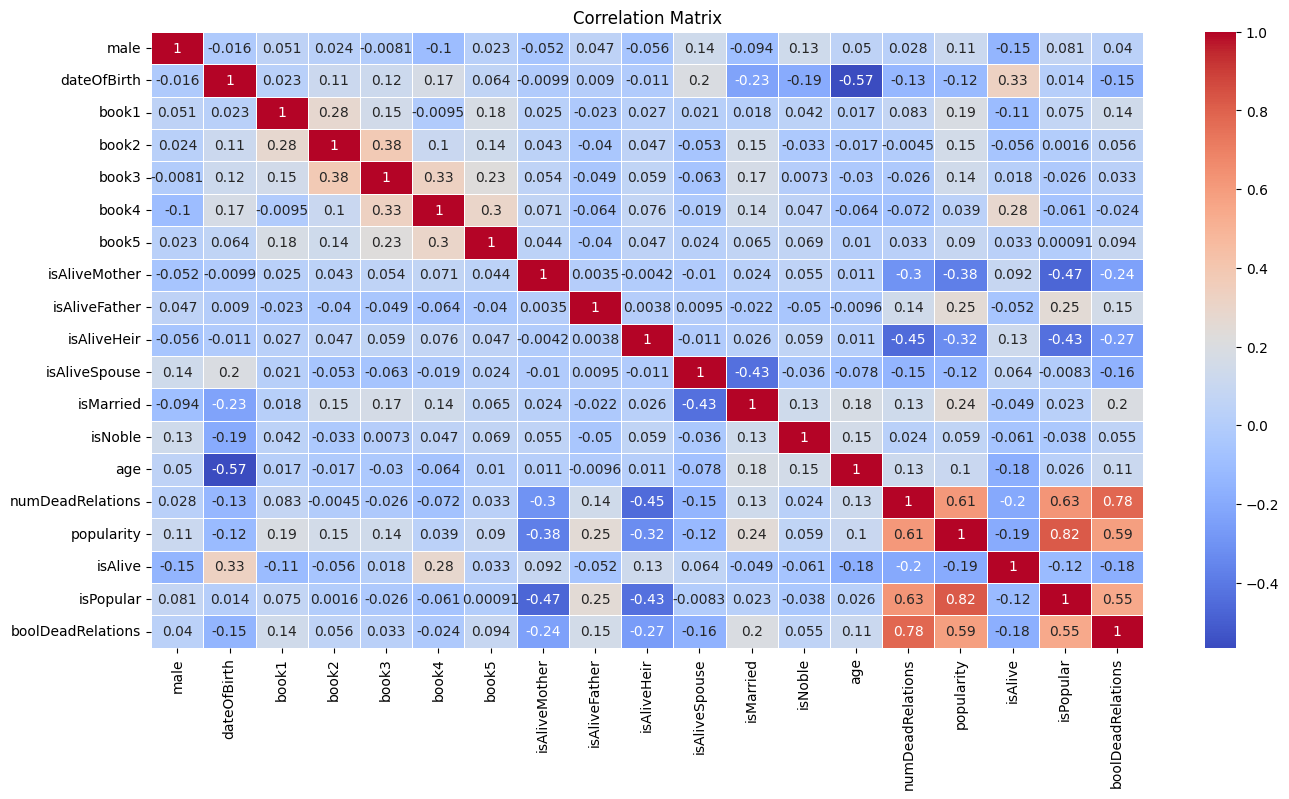

In [11]:
# Проверка потенциальной мультиколлинеарности для числовых столбцов
import seaborn as sns
import matplotlib.pyplot as plt

# Выбор только числовых столбцов для расчета корреляции
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Вычисление матрицы корреляций
corr_matrix = numeric_data.corr()

# Тепловая карта
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [12]:
#Проверка статистической значимости категориальных столбцов
from scipy.stats import chi2_contingency

# Фильтрация категориальных столбцов
categorical_columns = data.select_dtypes(include='object').columns

# Хранение результатов хи-квадрат теста
chi2_results = {}

for col in categorical_columns:
    # Создание таблицы сопряженности
    contingency_table = pd.crosstab(data[col], data['isAlive'])

    # Применение хи-квадрат теста
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Сохранение p-значения в словарь
    chi2_results[col] = p

# Вывод результатов
for col, p_value in chi2_results.items():
    print(f"Колонка: {col}, p-значение: {p_value}")

    if p_value < 0.05:
        print(f"Признак '{col}' статистически значим (p < 0.05)")
    else:
        print(f"Признак '{col}' не является статистически значимым (p >= 0.05)")

Колонка: name, p-значение: 0.4880844333346674
Признак 'name' не является статистически значимым (p >= 0.05)
Колонка: title, p-значение: 1.299273179804253e-05
Признак 'title' статистически значим (p < 0.05)
Колонка: culture, p-значение: 5.871952775929949e-10
Признак 'culture' статистически значим (p < 0.05)
Колонка: mother, p-значение: 1.1324070785619515e-05
Признак 'mother' статистически значим (p < 0.05)
Колонка: father, p-значение: 0.00013413607884804678
Признак 'father' статистически значим (p < 0.05)
Колонка: heir, p-значение: 9.430634990250258e-05
Признак 'heir' статистически значим (p < 0.05)
Колонка: house, p-значение: 0.0025793562191812995
Признак 'house' статистически значим (p < 0.05)
Колонка: spouse, p-значение: 0.0686497466433602
Признак 'spouse' не является статистически значимым (p >= 0.05)
Колонка: simplified_culture, p-значение: 7.1113158463451595e-12
Признак 'simplified_culture' статистически значим (p < 0.05)


In [14]:
# Удаление лишних столбцов
data.drop(columns=['popularity', 'numDeadRelations', 'culture', 'name', 'spouse'], inplace = True)

Причины удаления:

'popularity' - т.к. создали новый обработанный столбец isPopular, и чтобы исключить возможные проблемы мультиколлинеарности (см. матрицу корреляций выше);

'numDeadRelations' - т.к. создали новый обработанный столбец boolDeadRelations, и чтобы исключить возможные проблемы мультиколлинеарности (см. матрицу корреляций выше);

'culture' - т.к. создали новый обработанный столбец 'simplified_culture';

'name' - т.к. не является статистически значимым по хи-квадрат тесту (см. результаты теста выше);

'spouse' - т.к. не является статистически значимым по хи-квадрат тесту (см. результаты теста выше)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

Распределение целевой переменной (isAlive):
isAlive
1    1212
0     345
Name: count, dtype: int64

Доля каждого класса:
isAlive
1    0.77842
0    0.22158
Name: count, dtype: float64


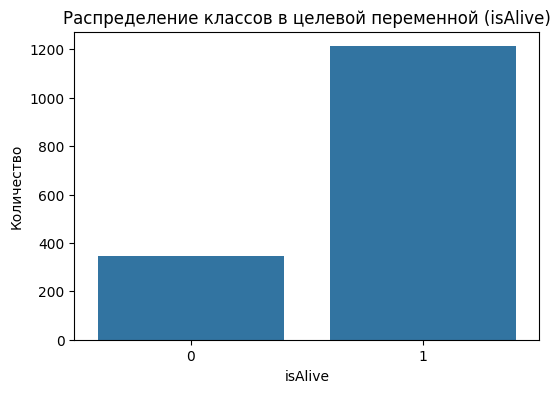

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Подсчет количества уникальных значений в целевой переменной
target_counts = data['isAlive'].value_counts()
print("Распределение целевой переменной (isAlive):")
print(target_counts)

# Проверка, сбалансирован ли датасет
total = len(data)
class_ratio = target_counts / total
print("\nДоля каждого класса:")
print(class_ratio)

# Визуализация распределения классов
plt.figure(figsize=(6, 4))
sns.countplot(x='isAlive', data=data)
plt.title('Распределение классов в целевой переменной (isAlive)')
plt.xlabel('isAlive')
plt.ylabel('Количество')
plt.show()

Целевая переменная является категориальной, принимает значения 1 или 0. Датасет не является сбалансированным, т.к. распределение:
1 - 0.77842
0 - 0.22158
один класс встречается в три раза чаще другого

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [16]:
# Применяем One-Hot Encoding ко всем категориальным столбцам
data_encoded = pd.get_dummies(data, drop_first=True)

# Проверяем, как изменился датафрейм
print("Новые колонки после кодирования:")
print(data_encoded.columns)

Новые колонки после кодирования:
Index(['male', 'dateOfBirth', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir',
       ...
       'simplified_culture_Stormlander', 'simplified_culture_Summer Islands',
       'simplified_culture_Tyroshi', 'simplified_culture_Vale',
       'simplified_culture_Vale mountain clans', 'simplified_culture_Valemen',
       'simplified_culture_Valyrian', 'simplified_culture_Westermen',
       'simplified_culture_Westerosi', 'simplified_culture_ironborn'],
      dtype='object', length=610)


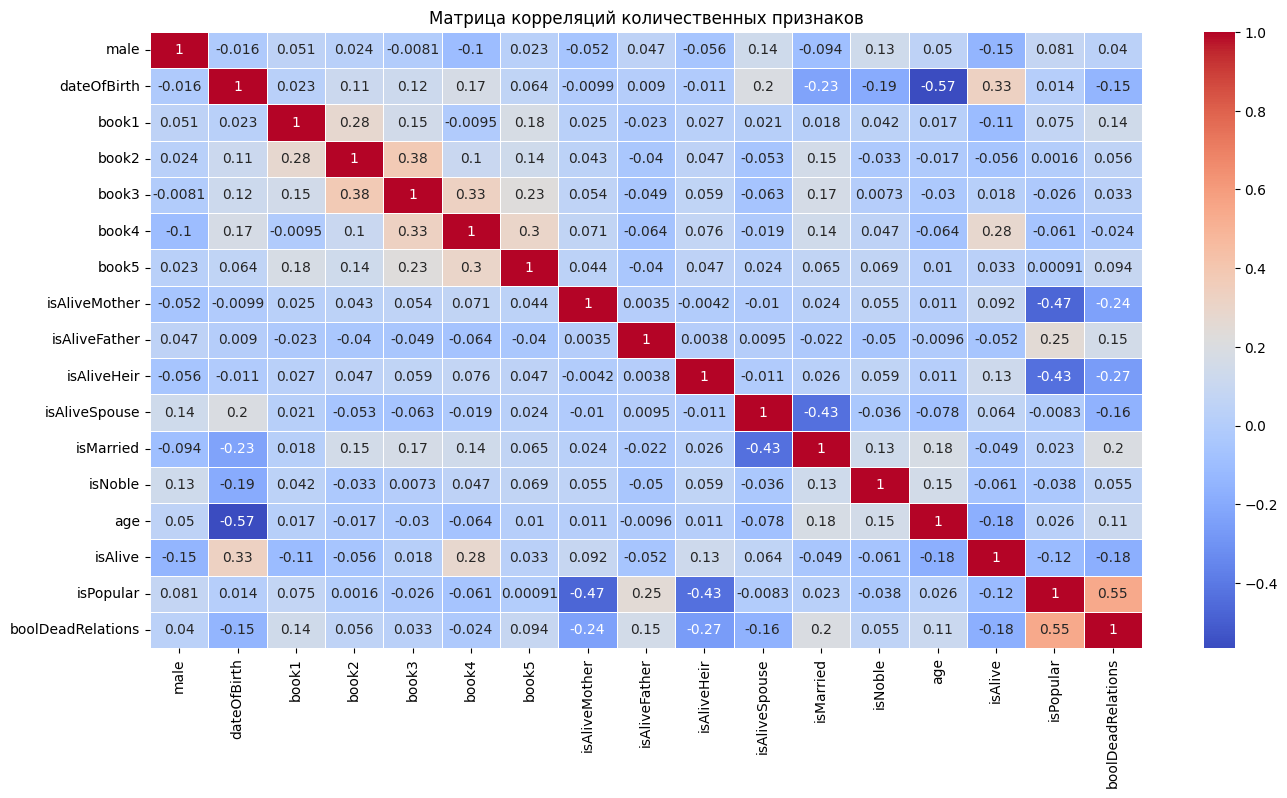

In [17]:
# Выбираем только количественные столбцы
numeric_columns = data_encoded.select_dtypes(include=['int64', 'float64']).columns

# Строим матрицу корреляции
corr_matrix = data_encoded[numeric_columns].corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Матрица корреляций количественных признаков")
plt.show()

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [18]:
import pandas as pd
from scipy.stats import pearsonr

# Создаем пустой список для хранения результатов
correlation_results = []

# Целевая переменная
target = 'isAlive'

# Проходим по всем числовым колонкам, кроме целевой переменной
for column in numeric_columns:
    if column != target:
        # Вычисляем коэффициент корреляции и p-значение
        corr, p_value = pearsonr(data_encoded[column], data_encoded[target])
        correlation_results.append([column, corr, p_value])

# Преобразуем результаты в DataFrame
correlation_df = pd.DataFrame(correlation_results, columns=['Feature', 'Correlation', 'P-value'])

# Анализ статистической значимости
correlation_df['Significant'] = correlation_df['P-value'].apply(lambda x: 'Yes' if x < 0.05 else 'No')

# Выводим таблицу с анализом
print(correlation_df)

              Feature  Correlation       P-value Significant
0                male    -0.148290  4.122552e-09         Yes
1         dateOfBirth     0.332522  1.644646e-41         Yes
2               book1    -0.112468  8.650380e-06         Yes
3               book2    -0.055998  2.713534e-02         Yes
4               book3     0.018427  4.674834e-01          No
5               book4     0.284014  2.823538e-30         Yes
6               book5     0.032531  1.995167e-01          No
7       isAliveMother     0.091617  2.948382e-04         Yes
8       isAliveFather    -0.051718  4.130497e-02         Yes
9         isAliveHeir     0.125958  6.163415e-07         Yes
10      isAliveSpouse     0.063894  1.167792e-02         Yes
11          isMarried    -0.049381  5.139968e-02          No
12            isNoble    -0.060572  1.683076e-02         Yes
13                age    -0.179331  1.015543e-12         Yes
14          isPopular    -0.118673  2.658941e-06         Yes
15  boolDeadRelations   

In [19]:
# Удаление незначимых столбцов
data_encoded.drop(columns=['book3', 'book5', 'isMarried'], inplace = True)

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [20]:
# Отделяем значения признаков и целевую переменную
X = data_encoded.drop(columns='isAlive')  # Все столбцы, кроме 'isAlive'
y = data_encoded['isAlive']                # Целевая переменная

# Проверка форматов данных
print("Форма X:", X.shape)
print("Форма y:", y.shape)

Форма X: (1557, 606)
Форма y: (1557,)


In [21]:
print(X.columns)

Index(['male', 'dateOfBirth', 'book1', 'book2', 'book4', 'isAliveMother',
       'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isNoble',
       ...
       'simplified_culture_Stormlander', 'simplified_culture_Summer Islands',
       'simplified_culture_Tyroshi', 'simplified_culture_Vale',
       'simplified_culture_Vale mountain clans', 'simplified_culture_Valemen',
       'simplified_culture_Valyrian', 'simplified_culture_Westermen',
       'simplified_culture_Westerosi', 'simplified_culture_ironborn'],
      dtype='object', length=606)


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [23]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [24]:
# Создаем трансформаторы для числовых и категориальных данных
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Объединяем трансформаторы в ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Проверяем размеры полученных выборок
print("Форма X_train:", X_train.shape)
print("Форма X_test:", X_test.shape)
print("Форма y_train:", y_train.shape)
print("Форма y_test:", y_test.shape)

Форма X_train: (1245, 606)
Форма X_test: (312, 606)
Форма y_train: (1245,)
Форма y_test: (312,)


## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [28]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [29]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [31]:
# Список моделей
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gaussian Process": GaussianProcessClassifier(),
    "GaussianNB": GaussianNB(),
    "K-Neighbors": KNeighborsClassifier(),
    "SVC": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

# Словарь для хранения предсказаний и оценок
predictions = {}
scores = {}

# Обучение и предсказание для каждой модели
for model_name, model in models.items():
    # Создаем пайплайн для каждой модели
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    # Обучение модели
    pipeline.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = pipeline.predict(X_test)

    # Сохранение предсказаний
    predictions[model_name] = y_pred

    # Оценка точности
    accuracy = accuracy_score(y_test, y_pred)
    scores[model_name] = accuracy

# Преобразуем предсказания в DataFrame для удобного отображения
predictions_df = pd.DataFrame(predictions)

# Вывод предсказаний и оценок
print("Predictions:\n", predictions_df)
print("\nAccuracy Scores:\n", scores)

Predictions:
      Logistic Regression  Random Forest  AdaBoost  Gaussian Process  \
0                      1              0         1                 0   
1                      1              1         1                 1   
2                      1              1         1                 1   
3                      1              1         1                 1   
4                      1              1         1                 1   
..                   ...            ...       ...               ...   
307                    1              1         1                 1   
308                    1              1         1                 1   
309                    1              1         1                 1   
310                    1              1         1                 1   
311                    1              1         1                 1   

     GaussianNB  K-Neighbors  SVC  Decision Tree  
0             0            1    0              1  
1             1            1   

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [32]:
from sklearn.metrics import accuracy_score

Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [33]:
# Вывод предсказаний и оценок
print("\nAccuracy Scores:\n", scores)


Accuracy Scores:
 {'Logistic Regression': 0.8205128205128205, 'Random Forest': 0.8076923076923077, 'AdaBoost': 0.8012820512820513, 'Gaussian Process': 0.8076923076923077, 'GaussianNB': 0.7948717948717948, 'K-Neighbors': 0.7115384615384616, 'SVC': 0.8012820512820513, 'Decision Tree': 0.8076923076923077}


In [34]:
data1 = pd.read_csv('/content/game_of_thrones_test.csv', index_col='S.No')

In [35]:
# Обработка NaN значений
if nan_summary.sum() > 0:
    # Заполняем NaN значениями медианы или моды
    for column in data1.columns:
        if data1[column].dtype == 'float64' or data1[column].dtype == 'int64':
            # Заполнение медианой для числовых данных
            median_value = data1[column].median()
            data1[column].fillna(median_value, inplace=True)
        else:
            # Заполнение модой для категориальных данных
            mode_value = data1[column].mode()[0]
            data1[column].fillna(mode_value, inplace=True)

    print("\nПосле заполнения NaN значений:")
    print(data1.isnull().sum())
else:
    print("\nВ датасете нет NaN значений.")


После заполнения NaN значений:
name                0
title               0
male                0
culture             0
dateOfBirth         0
mother              0
father              0
heir                0
house               0
spouse              0
book1               0
book2               0
book3               0
book4               0
book5               0
isAliveMother       0
isAliveFather       0
isAliveHeir         0
isAliveSpouse       0
isMarried           0
isNoble             0
age                 0
numDeadRelations    0
popularity          0
dtype: int64


<ipython-input-35-d2770b6b32b6>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1[column].fillna(mode_value, inplace=True)
<ipython-input-35-d2770b6b32b6>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [36]:
# Создание признака isPopular на основе порога popularity score (название атрибута в задании некорректное!)
data1['isPopular'] = data1['popularity'].apply(lambda x: 1 if x > 0.5 else 0)

# Создание признака boolDeadRelations на основе признака numDeadRelations
data1['boolDeadRelations'] = data1['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)


In [37]:
# Словарь
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

# Функция для упрощения признака culture
def simplify_culture(culture):
    for key, values in cult.items():
        if culture.lower() in values:
            return key
    return culture

# Применение функции к колонке culture
data1['simplified_culture'] = data1['culture'].apply(simplify_culture)

In [38]:
# Удаление лишних столбцов
data1.drop(columns=['popularity', 'numDeadRelations', 'culture', 'name', 'spouse', 'book3', 'book5', 'isMarried'], inplace = True)

In [39]:
# Применяем One-Hot Encoding ко всем категориальным столбцам
data1_encoded = pd.get_dummies(data1, drop_first=True)

In [40]:
X_train_data1 = data1_encoded

In [41]:
y_pred_new = pipeline.predict(X_train_data1)

# Создаем DataFrame с предсказаниями
predictions_df = pd.DataFrame({'prediction': y_pred_new})

# Сохраняем результаты в CSV файл
predictions_df.to_csv('predictions.csv', index=False)

# Вывод предсказаний
print("Predictions:\n", predictions_df)

Predictions:
      prediction
0             0
1             1
2             1
3             1
4             1
..          ...
384           1
385           1
386           1
387           1
388           1

[389 rows x 1 columns]
